Correlation Matrix (without CustomerID):
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


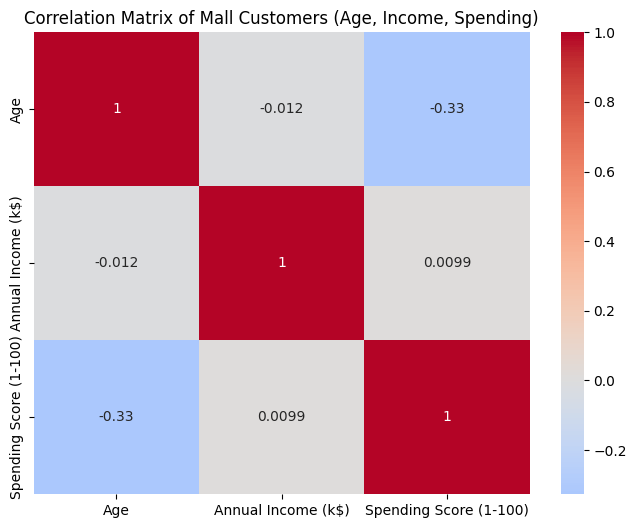

In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)


df = df.drop(columns=["CustomerID"])


numeric_df = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = numeric_df.corr()


print("Correlation Matrix (without CustomerID):")
print(corr_matrix)


plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Mall Customers (Age, Income, Spending)")
plt.show()


In [5]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

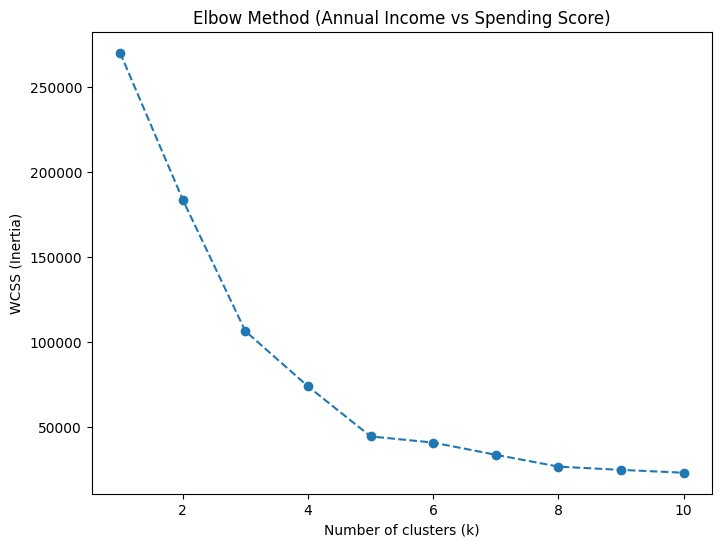

In [8]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method (Annual Income vs Spending Score)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


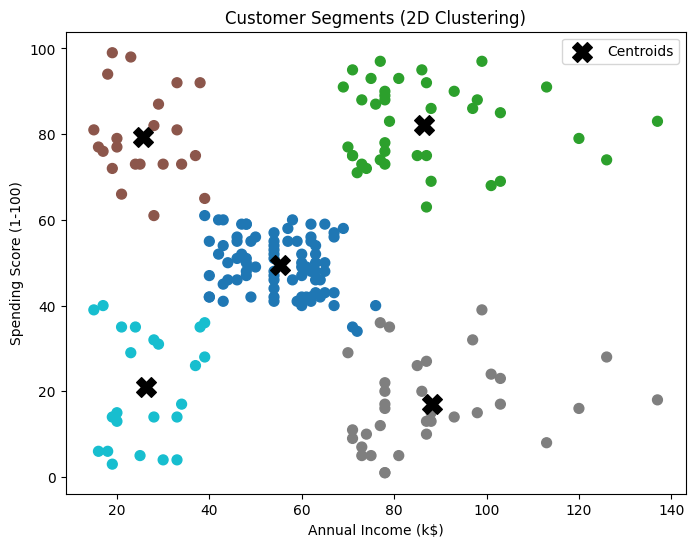

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1],
            c=y_kmeans, cmap='tab10', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='black', marker='X', label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (2D Clustering)")
plt.legend()
plt.show()


In [11]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

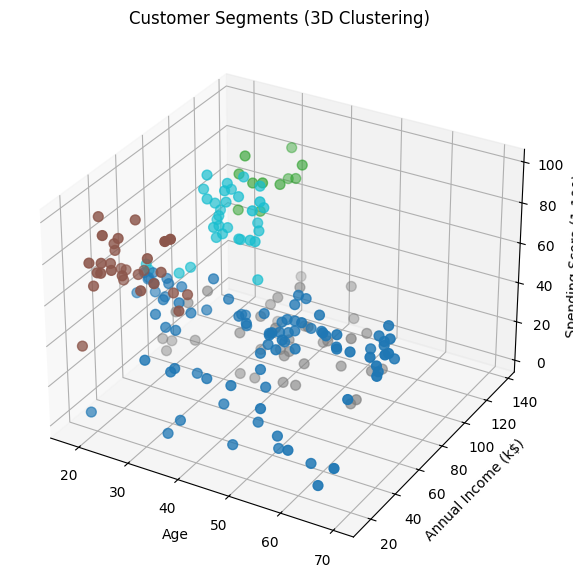

In [13]:
kmeans3 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans3 = kmeans3.fit_predict(X3)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X3.iloc[:,0], X3.iloc[:,1], X3.iloc[:,2],
           c=y_kmeans3, cmap='tab10', s=50)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("Customer Segments (3D Clustering)")

plt.show()


In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")


Silhouette Score for k=2: 0.396
Silhouette Score for k=3: 0.468
Silhouette Score for k=4: 0.494
Silhouette Score for k=5: 0.554
Silhouette Score for k=6: 0.513
Silhouette Score for k=7: 0.502
Silhouette Score for k=8: 0.496
Silhouette Score for k=9: 0.456
Silhouette Score for k=10: 0.443


In [16]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

print("Silhouette Scores (3D: Age, Income, Spending):")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X3)
    score = silhouette_score(X3, labels)
    print(f"k={k}: {score:.3f}")

Silhouette Scores (3D: Age, Income, Spending):
k=2: 0.332
k=3: 0.336
k=4: 0.405
k=5: 0.358
k=6: 0.416
k=7: 0.442
k=8: 0.433
k=9: 0.409
k=10: 0.397
